In [1]:
# Módulo/bibliotecas utilizadas
import numpy as np #operações numéricas
import pandas as pd #dados tabulares
import datetime #manipulação de listas de tempos
import matplotlib.pyplot as plt #plotagem 2D

Leitura dos dados

In [2]:
# Define caminhos de input e output
URL = 'https://raw.githubusercontent.com/cesar-rocha/integrativaI/main/data/sealevel/can2004.dtf' # url de dados (input)
IMG_PATH  = 'C:/Users/eduar/OneDrive/Área de Trabalho/aulas mac/integrativa'                  # diretório de imagens (output)

In [3]:
# Leitura dos dados tabulares utilizando o módulo pandas (pd)
cols = ['time','year','month','day','hour','sealevel','flag']    # define nomes das colunas da tabela de dados
df = pd.read_csv(URL,names=cols, sep='\s+')       # faz a leitura dos dados

In [4]:
df

,time,year,month,day,hour,sealevel,flag
0,0,2004,1,1,0.0,2.171,0
1,3600,2004,1,1,1.0,2.069,0
2,7200,2004,1,1,2.0,1.938,0
3,10800,2004,1,1,3.0,1.860,0
4,14400,2004,1,1,4.0,1.792,0
...,...,...,...,...,...,...,...
8779,31604400,2004,12,31,19.0,2.155,0
8780,31608000,2004,12,31,20.0,2.041,0
8781,31611600,2004,12,31,21.0,1.828,0
8782,31615200,2004,12,31,22.0,1.613,0


In [5]:
# Cria array de datetime64 (interpretador do tempo corrido) e coloca no dataframe ds
time =  [np.datetime64(
                datetime.datetime(year=df['year'][k],
                month=df['month'][k],
                day=df['day'][k],
                hour=int(df['hour'][k])))
            for k in range(len(df['year']))]  # laço for no estilo "comprehension list"

time = np.array(time)    # transforma lista em array
df['datetime'] = time    # coloca o array no dataframe df

In [6]:
df

,time,year,month,day,hour,sealevel,flag,datetime
0,0,2004,1,1,0.0,2.171,0,2004-01-01 00:00:00
1,3600,2004,1,1,1.0,2.069,0,2004-01-01 01:00:00
2,7200,2004,1,1,2.0,1.938,0,2004-01-01 02:00:00
3,10800,2004,1,1,3.0,1.860,0,2004-01-01 03:00:00
4,14400,2004,1,1,4.0,1.792,0,2004-01-01 04:00:00
...,...,...,...,...,...,...,...,...
8779,31604400,2004,12,31,19.0,2.155,0,2004-12-31 19:00:00
8780,31608000,2004,12,31,20.0,2.041,0,2004-12-31 20:00:00
8781,31611600,2004,12,31,21.0,1.828,0,2004-12-31 21:00:00
8782,31615200,2004,12,31,22.0,1.613,0,2004-12-31 22:00:00


Plot simples dos dados

Text(0, 0.5, 'Nível do mar [m]')

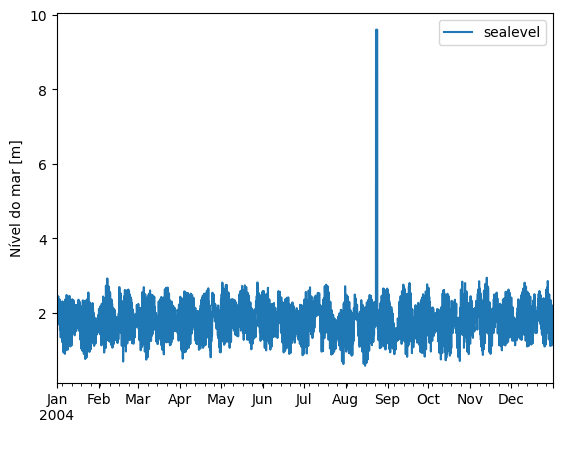

In [7]:
df.plot('datetime','sealevel') #plot do dataframe escolhendo duas variáveis do df (x,y)
plt.xlabel(' ') #label eixo x
plt.ylabel('Nível do mar [m]') #label eixo y

In [8]:
# Remove dado suspeito (apesar da flag boa) com nível do mar acima de 7 m
df[df.sealevel>7] = np.nan #nan - not a number

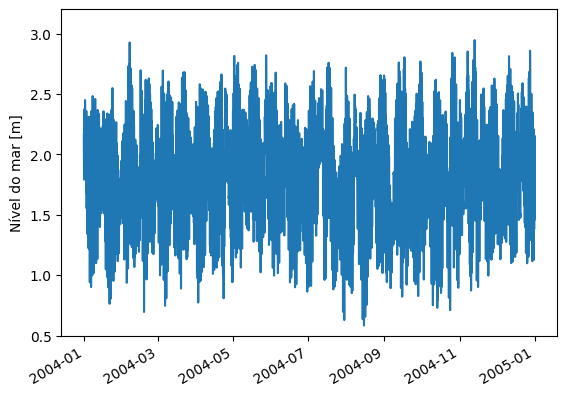

In [9]:
# Plota e salva série de tempo de nível do mar (2004)
df.plot('datetime','sealevel',legend=False)
plt.ylim(0.5,3.2)
plt.xlabel(' ')
plt.ylabel('Nível do mar [m]')
plt.savefig('/niveldomar_cananeia_2004.png')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Seleciona um único mês
df_feb = df[df.month == 2]

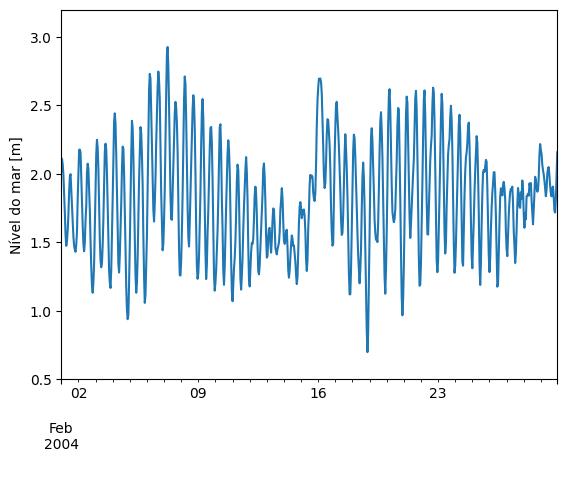

In [12]:
# Plota e salva série de tempo de nível do mar (julho de 2004)
df_feb.plot('datetime','sealevel',legend=False)
plt.ylim(0.5,3.2)
plt.xlabel(' ')
plt.ylabel('Nível do mar [m]')
plt.savefig('niveldomar_cananeia_200402.png')

In [13]:
# select single month
df_day = df_feb[df_feb.day == 19]

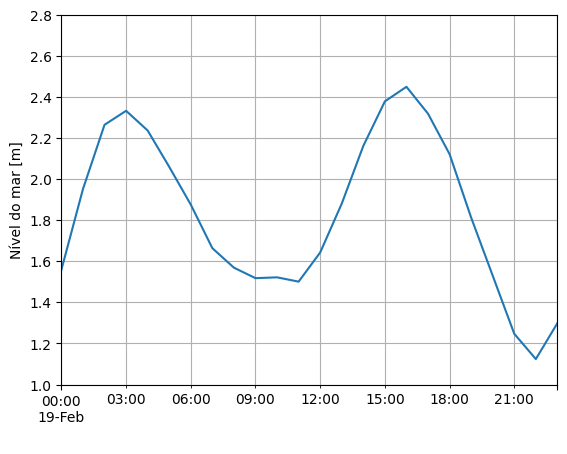

In [14]:
# Plota e salva série de tempo de nível do mar (4 de julho de 2004)
fig, ax = plt.subplots()
df_day.plot('datetime','sealevel',legend=False,ax=ax)
plt.ylim(1,2.8)
ax.grid(axis='both', which='both')
plt.xlabel(' ')
plt.ylabel('Nível do mar [m]')
plt.savefig('niveldomar_cananeia_20040219.png')